In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

In [3]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100
data_augmentation = False

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


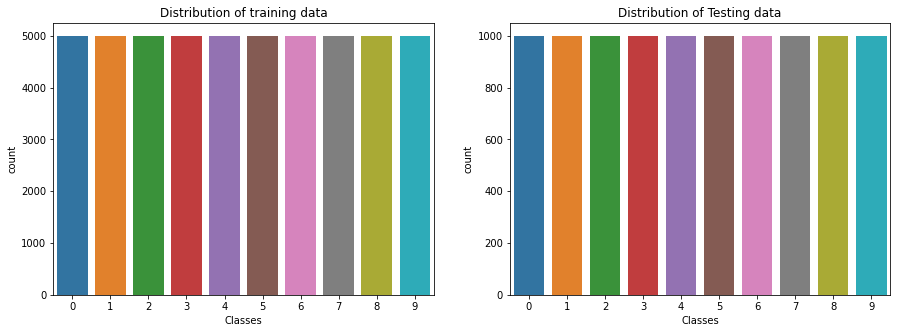

In [5]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [6]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

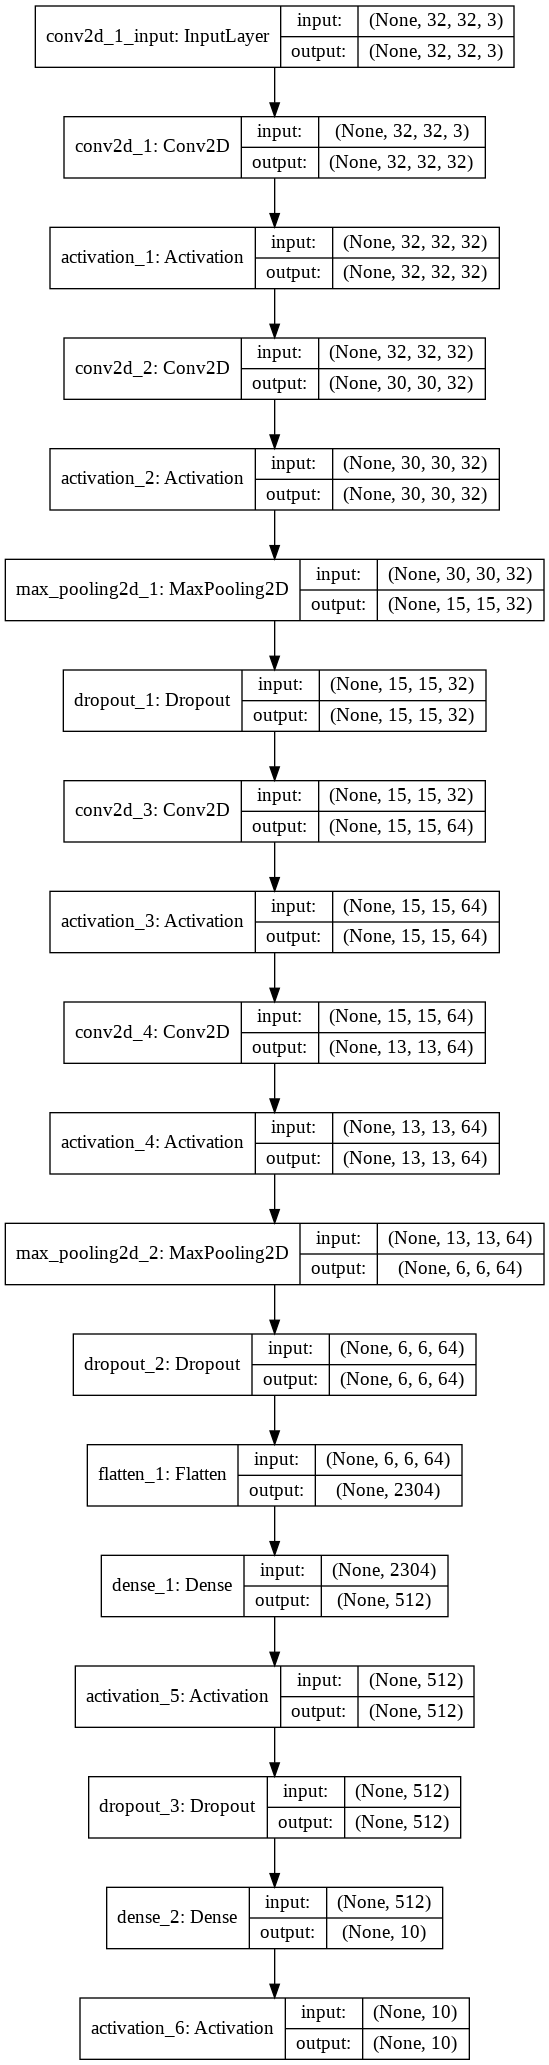

In [7]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

keras.utils.plot_model(model, "my_first_model.png")
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [8]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
history = None  # For recording the history of trainning process.

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 307us/step - loss: 1.8194 - accuracy: 0.3334 - val_loss: 1.5547 - val_accuracy: 0.4444
Epoch 2/100
50000/50000 [==============================] - 9s 180us/step - loss: 1.5001 - accuracy: 0.4542 - val_loss: 1.3425 - val_accuracy: 0.5251
Epoch 3/100
50000/50000 [==============================] - 9s 180us/step - loss: 1.3651 - accuracy: 0.5093 - val_loss: 1.3004 - val_accuracy: 0.5407
Epoch 4/100
50000/50000 [==============================] - 9s 180us/step - loss: 1.2692 - accuracy: 0.5462 - val_loss: 1.1642 - val_accuracy: 0.5869
Epoch 5/100
50000/50000 [==============================] - 9s 182us/step - loss: 1.1918 - accuracy: 0.5793 - val_loss: 1.0935 - val_accuracy: 0.6139
Epoch 6/100
50000/50000 [==============================] - 9s 181us/step - loss: 1.1231 - accuracy: 0.6039 - val_loss: 1.0711 - val_accuracy: 0.6277
Epoch 7/100
50000/50000 [==============================

Here we achived an accuracy of 76.88%

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


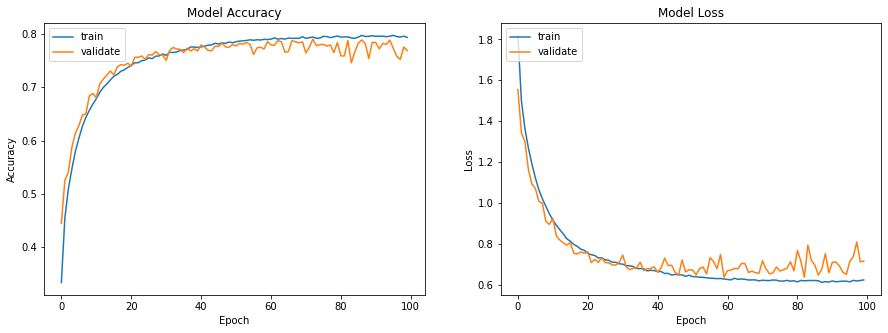

In [11]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [12]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

10000/10000 [==============================] - 1s 84us/step
Test loss: 0.7169316907405854
Test accuracy: 0.7688000202178955


## Adding an extra layer with change in dropout and decreasing the number of epocs.

In [37]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [38]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_75 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_76 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 15, 15, 64)      

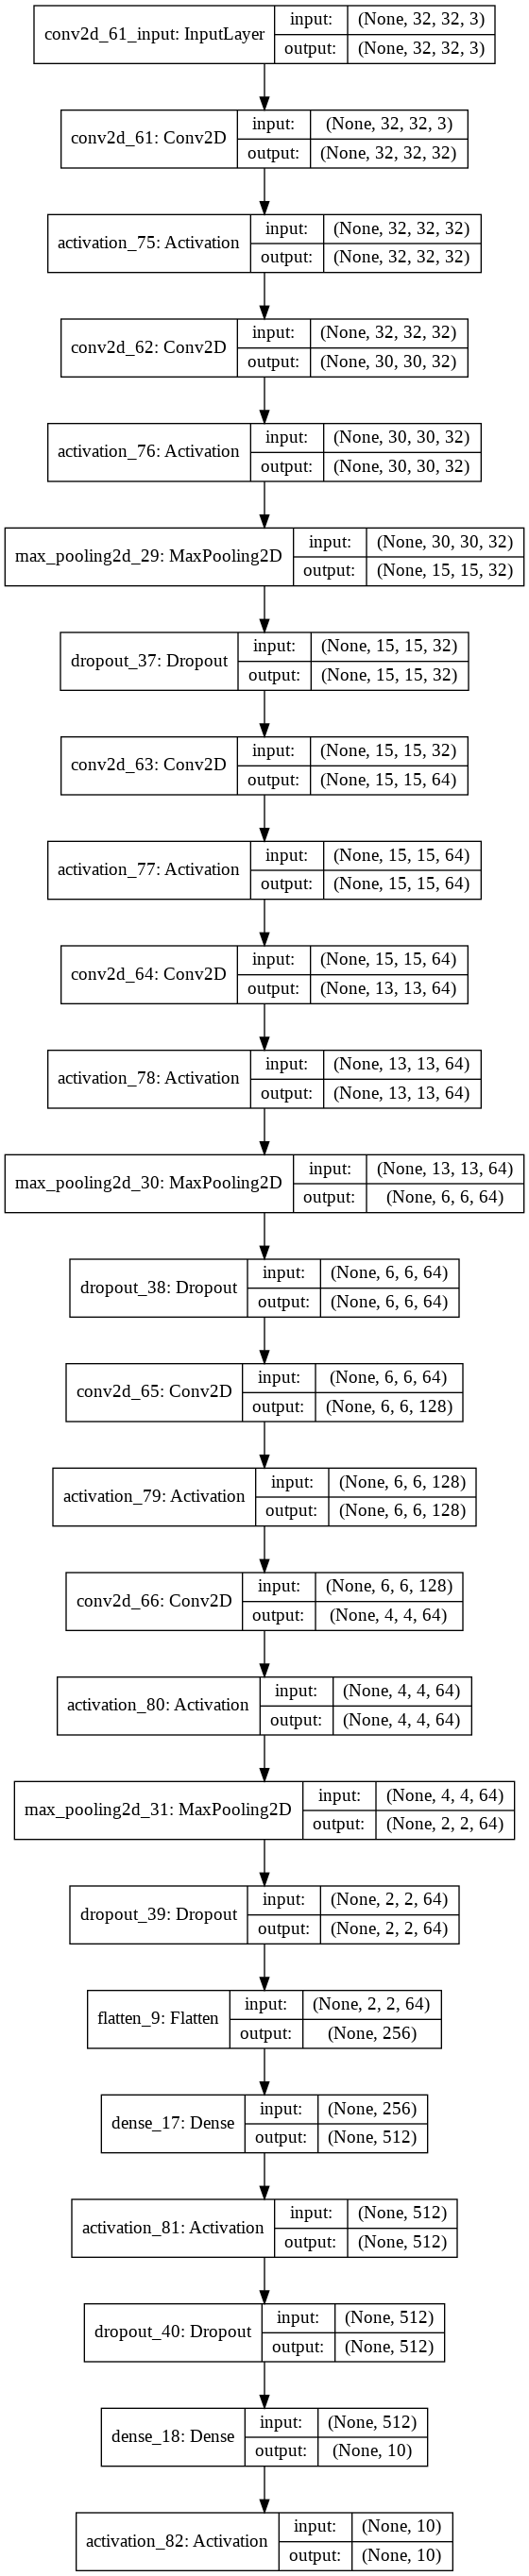

In [39]:
# Seeing th shape of the CNN model
keras.utils.plot_model(model, "my_first_model.png")
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [40]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



In [41]:
history = None  # For recording the history of trainning process.

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=90,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/90
50000/50000 [==============================] - 10s 204us/step - loss: 1.9827 - accuracy: 0.2450 - val_loss: 1.7085 - val_accuracy: 0.3761
Epoch 2/90
50000/50000 [==============================] - 10s 196us/step - loss: 1.6830 - accuracy: 0.3736 - val_loss: 1.4897 - val_accuracy: 0.4462
Epoch 3/90
50000/50000 [==============================] - 10s 196us/step - loss: 1.5207 - accuracy: 0.4403 - val_loss: 1.3867 - val_accuracy: 0.4837
Epoch 4/90
50000/50000 [==============================] - 10s 197us/step - loss: 1.4105 - accuracy: 0.4846 - val_loss: 1.3198 - val_accuracy: 0.5215
Epoch 5/90
50000/50000 [==============================] - 10s 197us/step - loss: 1.3195 - accuracy: 0.5210 - val_loss: 1.2249 - val_accuracy: 0.5577
Epoch 6/90
50000/50000 [==============================] - 10s 196us/step - loss: 1.2423 - accuracy: 0.5507 - val_loss: 1.1647 - val_accuracy: 0.5802
Epoch 7/90
50000/50000 [==============================] 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


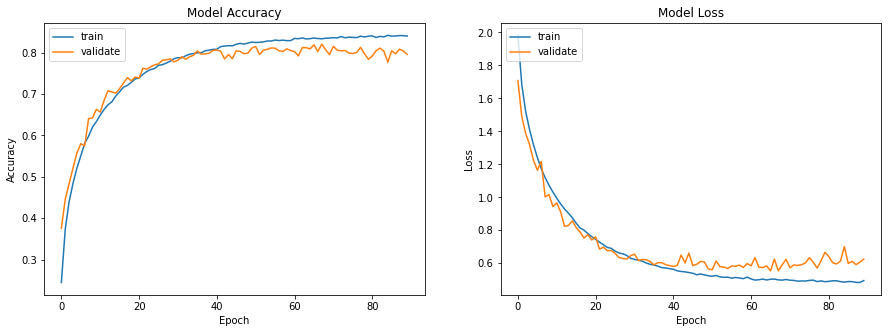

In [42]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [43]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

10000/10000 [==============================] - 1s 90us/step
Test loss: 0.6249389933109284
Test accuracy: 0.7955999970436096


## Changing the learnig rate with sight change in layer 



In [46]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [47]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_91 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_92 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 15, 15, 64)      

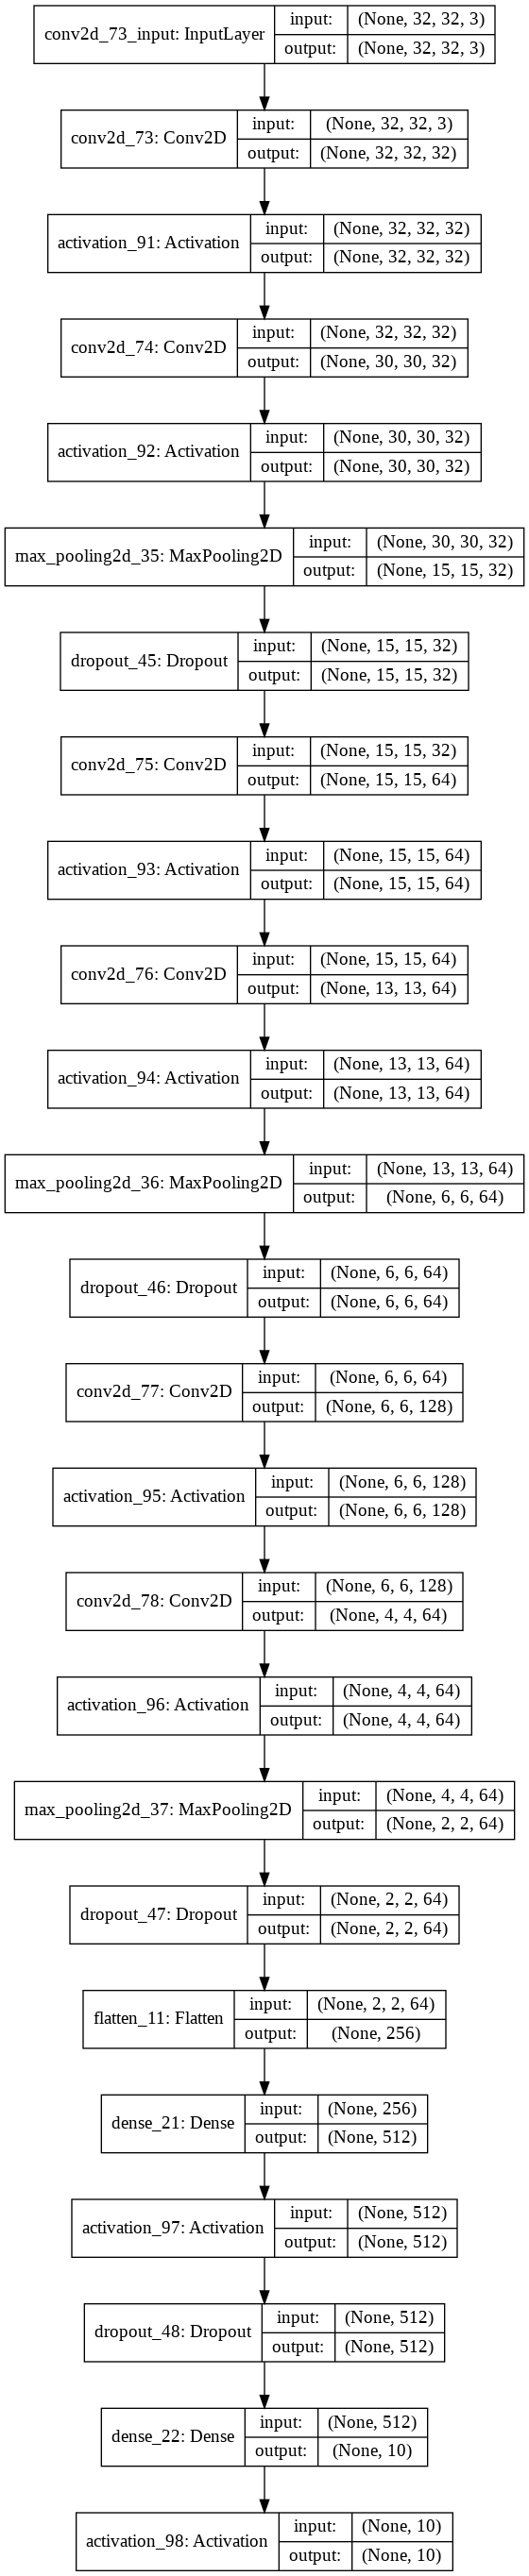

In [48]:
# Seeing th shape of the CNN model
keras.utils.plot_model(model, "my_first_model.png")
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [49]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-5)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [50]:
history = None  # For recording the history of trainning process.

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=90,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/90
50000/50000 [==============================] - 10s 203us/step - loss: 1.6993 - accuracy: 0.3740 - val_loss: 1.2756 - val_accuracy: 0.5394
Epoch 2/90
50000/50000 [==============================] - 10s 198us/step - loss: 1.3037 - accuracy: 0.5412 - val_loss: 1.1802 - val_accuracy: 0.5953
Epoch 3/90
50000/50000 [==============================] - 10s 199us/step - loss: 1.1669 - accuracy: 0.5980 - val_loss: 1.3429 - val_accuracy: 0.5489
Epoch 4/90
50000/50000 [==============================] - 10s 201us/step - loss: 1.1094 - accuracy: 0.6234 - val_loss: 1.1456 - val_accuracy: 0.6368
Epoch 5/90
50000/50000 [==============================] - 10s 197us/step - loss: 1.1060 - accuracy: 0.6335 - val_loss: 0.9194 - val_accuracy: 0.6887
Epoch 6/90
50000/50000 [==============================] - 10s 197us/step - loss: 1.1038 - accuracy: 0.6366 - val_loss: 1.2530 - val_accuracy: 0.5575
Epoch 7/90
50000/50000 [==============================] 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


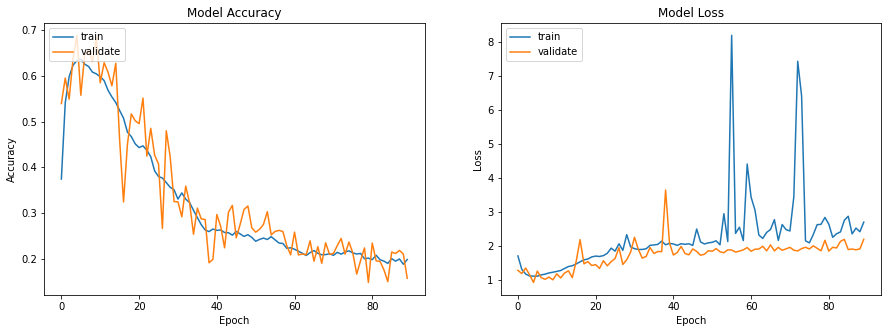

In [51]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [52]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

10000/10000 [==============================] - 1s 88us/step
Test loss: 2.1892938190460205
Test accuracy: 0.156700000166893


## Decreasing the layer and increasing the learning rate and changing the number of epocs

In [59]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [60]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_107 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_108 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 15, 15, 64)      

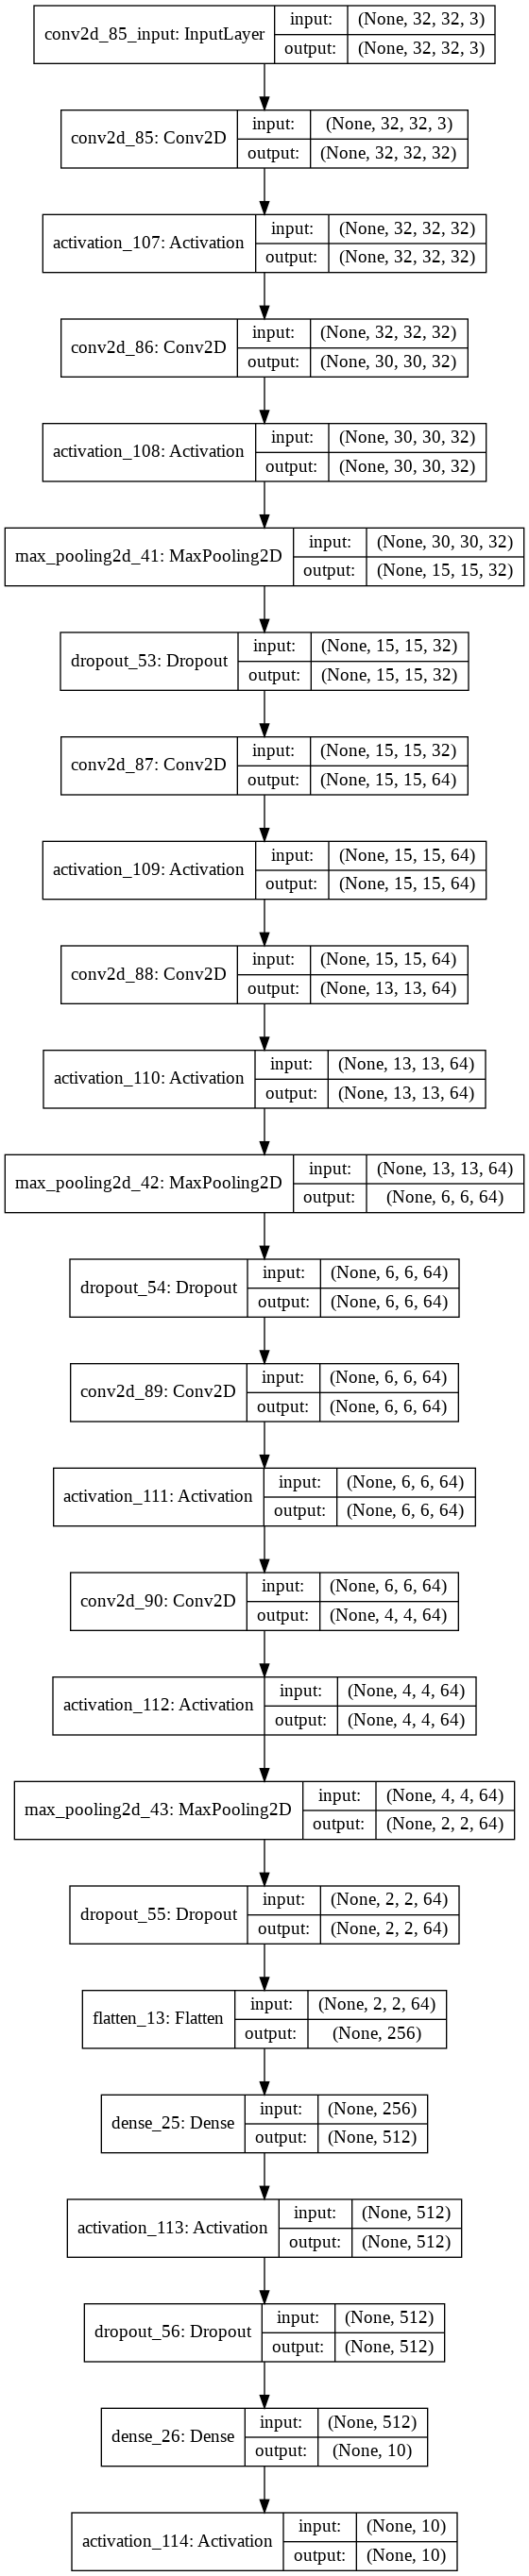

In [61]:
# Seeing th shape of the CNN model
keras.utils.plot_model(model, "my_first_model.png")
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [62]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-7)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [63]:
history = None  # For recording the history of trainning process.

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=200,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 10s 205us/step - loss: 2.2895 - accuracy: 0.1197 - val_loss: 2.2397 - val_accuracy: 0.1795
Epoch 2/200
50000/50000 [==============================] - 10s 198us/step - loss: 2.1457 - accuracy: 0.1830 - val_loss: 2.0712 - val_accuracy: 0.2265
Epoch 3/200
50000/50000 [==============================] - 10s 198us/step - loss: 2.0701 - accuracy: 0.2096 - val_loss: 2.0140 - val_accuracy: 0.2469
Epoch 4/200
50000/50000 [==============================] - 10s 198us/step - loss: 2.0145 - accuracy: 0.2263 - val_loss: 1.9746 - val_accuracy: 0.2523
Epoch 5/200
50000/50000 [==============================] - 10s 197us/step - loss: 1.9574 - accuracy: 0.2407 - val_loss: 1.9237 - val_accuracy: 0.2725
Epoch 6/200
50000/50000 [==============================] - 10s 197us/step - loss: 1.9091 - accuracy: 0.2606 - val_loss: 1.8464 - val_accuracy: 0.3182
Epoch 7/200
50000/50000 [=========================

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


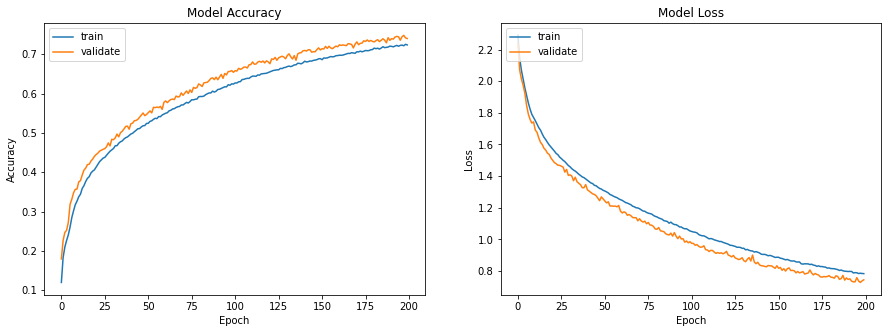

In [64]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [65]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

10000/10000 [==============================] - 1s 86us/step
Test loss: 0.7445887320518494
Test accuracy: 0.7401000261306763


## Using Pre Tranning Model

## 1 VGG net

In [78]:
from keras.applications.vgg16 import VGG16
from keras.layers import Lambda, Input
import tensorflow as ktf

model = VGG16(input_shape=(224, 224, 3))

In [79]:
model = VGG16(weights='imagenet', input_shape=(224, 224, 3))

In [80]:
from keras.models import Model
from keras.layers import Dense

#Load the VGG
model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

# Freeze all the layers
for layer in model.layers[:]:
    layer.trainable = False
    
output = model.get_layer('fc2').output
output = Dense(units=10, activation='softmax')(output)
model = Model(model.input, output)

In [81]:
newInput = Input(batch_shape=(None, 32, 32, 3))
resizedImg = Lambda(lambda image: ktf.image.resize(image, (224, 224)))(newInput)
newOutputs = model(resizedImg)
model = Model(newInput, newOutputs)

In [82]:
from keras.layers import Dense, Flatten

model = VGG16(include_top=False, input_shape=(32,32,3), weights='imagenet')

# Freeze all the layers
for layer in model.layers[:]:
    layer.trainable = False

# Add Dense layer as in VGG16
output = model.output
output = Flatten()(output)
output = Dense(units=4096, activation='relu')(output)
output = Dense(units=4096, activation='relu')(output)
output = Dense(units=10, activation='softmax')(output)
model = Model(model.input, output)

58892288/58889256 [==============================] - 2s 0us/step


In [83]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=32,  validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 19s 477us/step - loss: 1.3770 - categorical_accuracy: 0.5189 - val_loss: 1.3048 - val_categorical_accuracy: 0.5416
Epoch 2/50
40000/40000 [==============================] - 19s 468us/step - loss: 1.1795 - categorical_accuracy: 0.5841 - val_loss: 1.1954 - val_categorical_accuracy: 0.5813
Epoch 3/50
40000/40000 [==============================] - 19s 468us/step - loss: 1.0894 - categorical_accuracy: 0.6145 - val_loss: 1.1574 - val_categorical_accuracy: 0.5978
Epoch 4/50
40000/40000 [==============================] - 19s 467us/step - loss: 1.0192 - categorical_accuracy: 0.6382 - val_loss: 1.1642 - val_categorical_accuracy: 0.6007
Epoch 5/50
40000/40000 [==============================] - 19s 468us/step - loss: 0.9539 - categorical_accuracy: 0.6568 - val_loss: 1.2066 - val_categorical_accuracy: 0.6059
Epoch 6/50
40000/40000 [==============================] - 19s 469us/step - loss: 0.88

In [84]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 235us/step
Test loss: 4.920616878890991
Test accuracy: 0.5776000022888184


## 2 Inception

In [85]:
from keras.applications.inception_v3 import InceptionV3

model = InceptionV3(include_top=True, weights='imagenet', classes=1000)

96116736/96112376 [==============================] - 4s 0us/step


In [87]:
from keras.models import Model
from keras.layers import Lambda, Input
from keras.layers import Dense, GlobalMaxPooling2D
from keras.applications.inception_v3 import InceptionV3

model = InceptionV3(include_top=False, input_shape=(75, 75, 3), weights='imagenet')

# Resize Input images to 75x75
newInput = Input(batch_shape=(None, 32, 32, 3))
resizedImg = Lambda(lambda image: ktf.image.resize(image, (75, 75)))(newInput)
newOutputs = model(resizedImg)
model = Model(newInput, newOutputs)

# Freeze all the layers
for layer in model.layers[:]:
    layer.trainable = False

# Add Dense layer to classify on CIFAR10
output = model.output
output = GlobalMaxPooling2D()(output)
output = Dense(units=10, activation='softmax')(output)
model = Model(model.input, output)

model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
lambda_4 (Lambda)            (None, 75, 75, 3)         0         
_________________________________________________________________
inception_v3 (Model)         (None, 1, 1, 2048)        21802784  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                20490     
Total params: 21,823,274
Trainable params: 20,490
Non-trainable params: 21,802,784
_________________________________________________________________


In [88]:
print(x_train.shape)
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=32,  validation_split=0.2)

(50000, 32, 32, 3)
Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 42s 1ms/step - loss: 1.8634 - categorical_accuracy: 0.3553 - val_loss: 2.1422 - val_categorical_accuracy: 0.3479
Epoch 2/50
40000/40000 [==============================] - 38s 962us/step - loss: 1.6882 - categorical_accuracy: 0.4228 - val_loss: 2.2141 - val_categorical_accuracy: 0.3605
Epoch 3/50
40000/40000 [==============================] - 38s 956us/step - loss: 1.6664 - categorical_accuracy: 0.4322 - val_loss: 2.2462 - val_categorical_accuracy: 0.3633
Epoch 4/50
40000/40000 [==============================] - 38s 958us/step - loss: 1.6538 - categorical_accuracy: 0.4363 - val_loss: 2.3390 - val_categorical_accuracy: 0.3581
Epoch 5/50
40000/40000 [==============================] - 38s 958us/step - loss: 1.6440 - categorical_accuracy: 0.4367 - val_loss: 2.2728 - val_categorical_accuracy: 0.3681
Epoch 6/50
40000/40000 [==============================] - 38s 958us/

In [89]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 9s 876us/step
Test loss: 2.4519500469207762
Test accuracy: 0.36039999127388


## 3 ResNet

In [90]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=False, input_shape=(32,32,3), weights='imagenet')

# Freeze all the layers
for layer in model.layers[:]:
    layer.trainable = False

# Add Dense layer to classify on CIFAR10
output = model.output
output = GlobalAveragePooling2D()(output)
output = Dense(units=10, activation='softmax')(output)
model = Model(model.input, output)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step


In [91]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=32,  validation_split=0.2)

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 25s 628us/step - loss: 1.9336 - categorical_accuracy: 0.3983 - val_loss: 6.1881 - val_categorical_accuracy: 0.0952
Epoch 2/50
40000/40000 [==============================] - 23s 573us/step - loss: 1.7059 - categorical_accuracy: 0.4566 - val_loss: 5.8142 - val_categorical_accuracy: 0.1014
Epoch 3/50
40000/40000 [==============================] - 23s 576us/step - loss: 1.6741 - categorical_accuracy: 0.4644 - val_loss: 6.5754 - val_categorical_accuracy: 0.1014
Epoch 4/50
40000/40000 [==============================] - 23s 584us/step - loss: 1.6777 - categorical_accuracy: 0.4687 - val_loss: 6.4831 - val_categorical_accuracy: 0.1014
Epoch 5/50
40000/40000 [==============================] - 23s 572us/step - loss: 1.6704 - categorical_accuracy: 0.4689 - val_loss: 6.9316 - val_categorical_accuracy: 0.1012
Epoch 6/50
40000/40000 [==============================] - 23s 571us/step - loss: 1.67

In [92]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 5s 540us/step
Test loss: 7.764180782318115
Test accuracy: 0.10000000149011612
